In [1]:
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
# import pylab
# pylab.rcParams['figure.figsize'] = (8.0, 10.0)

In [2]:
dataDir='.'
dataType='val2014'
annFile='{}/annotations/instances_{}.json'.format(dataDir,dataType)

In [3]:
coco=COCO(annFile)

loading annotations into memory...
Done (t=4.93s)
creating index...
index created!


In [4]:
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(nms)))

nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories: \n{}'.format(' '.join(nms)))

COCO categories: 
person bicycle car motorcycle airplane bus train truck boat traffic light fire hydrant stop sign parking meter bench bird cat dog horse sheep cow elephant bear zebra giraffe backpack umbrella handbag tie suitcase frisbee skis snowboard sports ball kite baseball bat baseball glove skateboard surfboard tennis racket bottle wine glass cup fork knife spoon bowl banana apple sandwich orange broccoli carrot hot dog pizza donut cake chair couch potted plant bed dining table toilet tv laptop mouse remote keyboard cell phone microwave oven toaster sink refrigerator book clock vase scissors teddy bear hair drier toothbrush

COCO supercategories: 
sports outdoor food indoor electronic appliance furniture person animal vehicle kitchen accessory


In [5]:
# catIds = coco.getCatIds(catNms=['person']);
# imgIds = coco.getImgIds(catIds=catIds );
# images = coco.loadImgs(imgIds)

In [5]:
# plt.imshow(I)
# annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
# anns = coco.loadAnns(annIds)
# coco.showAnns(anns)
import cv2
from PIL import Image
from os import path

catIds = coco.getCatIds(catNms=['person']);
imgIds = coco.getImgIds(catIds=catIds );
images = coco.loadImgs(imgIds)
print(len(images))
for im in images:
    if path.isfile('downloaded_images_person/' + im['file_name']):
        print('Skipped!')
        continue
    print(im['coco_url'])
    img_data = io.imread(im['coco_url'])
    Image.fromarray(img_data).save('downloaded_images_person/' + im['file_name'])
    annIds = coco.getAnnIds(imgIds=im['id'], catIds=catIds, iscrowd=None)
    anns = coco.loadAnns(annIds)
    mask = coco.annToMask(anns[0])
    for i in range(len(anns)):
        mask = mask | coco.annToMask(anns[i])
    mask = mask*255
    Image.fromarray(mask).save('downloaded_images_person_binary/' + im['file_name']+'_binary.png')

21634
http://images.cocodataset.org/val2014/COCO_val2014_000000458755.jpg
http://images.cocodataset.org/val2014/COCO_val2014_000000262148.jpg
http://images.cocodataset.org/val2014/COCO_val2014_000000294918.jpg
http://images.cocodataset.org/val2014/COCO_val2014_000000229383.jpg
http://images.cocodataset.org/val2014/COCO_val2014_000000032777.jpg
http://images.cocodataset.org/val2014/COCO_val2014_000000393226.jpg


KeyboardInterrupt: 

In [10]:
annFile = '{}/annotations/person_keypoints_{}.json'.format(dataDir,dataType)
coco_kps=COCO(annFile)

loading annotations into memory...
Done (t=2.10s)
creating index...
index created!


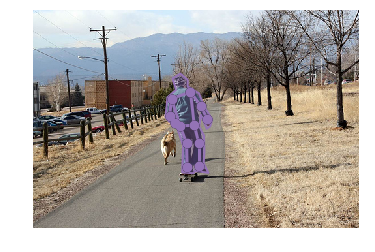

In [11]:
plt.imshow(I); plt.axis('off')
ax = plt.gca()
annIds = coco_kps.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco_kps.loadAnns(annIds)
coco_kps.showAnns(anns)
